# Dog Breed Identification Using Deep Learning

---

## Problem Statement ~

We often do you get stuck thinking about the name of a dog’s breed. There are many dog breeds and most of them are similar to each other. Can we use a dog breeds dataset and build a Deep
Learning model that will classify different dog breeds from an image. Use Convolutional Neural Networks to build the model.

## Dataset

The dataset for this project is available on Kaggle. <br>

**Link** : https://www.kaggle.com/c/dog-breed-identification/data

## Evaluation

We shall use <code>Accuracy</code>, <code>Precision</code>, <code>Recall</code> and <code>F1 score</code> to evaluate the performance of our models, along with the heatmap of the confusion matrix.<br>

---

## Table of Contents

### 1. Environment Setup
### 2. Dataset Gathering
### 3. Exploratory Data Analysis
### 4. Dataset Preprocessing
### 5. Model Evaluation
### 6. Performance Measurement

# 1. Environment Setup:
---

> In this step, we have installed and imported all neccessary libraries required to proceed with the solution to the given problem statement.

In [1]:
import os
import cv2
import tqdm
import random
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")                   # Suppressing Jupyter Notebook Warnings
from IPython.display import display, Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

# 2. Dataset Gathering
---
> In this step, we have gathered the dataset from kaggle and have verified its integrity.

In [2]:
# Importing the labels dataset
labels_csv = pd.read_csv('../input/dog-breed-identification/labels.csv')

# Viewing the head of the dataset
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [3]:
# Saving the training dataset path to a variable
train_path = "../input/dog-breed-identification/train/"

# Creating image paths from the name
filenames = [train_path + fname + ".jpg" for fname in labels_csv['id']]

# Viewing the first 10 filenames
filenames[:10]

['../input/dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '../input/dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '../input/dog-breed-identification/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '../input/dog-breed-identification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '../input/dog-breed-identification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '../input/dog-breed-identification/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '../input/dog-breed-identification/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '../input/dog-breed-identification/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '../input/dog-breed-identification/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '../input/dog-breed-identification/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [4]:
# Checking whether the number of filenames in the directory matches to that of ours
print(len(os.listdir(train_path)) == len(filenames))

True


# 3. Exploratory Data Analysis
---
> In this step, we took a deeper look at the data, and checked if the data is properly gathered in the previous steps.

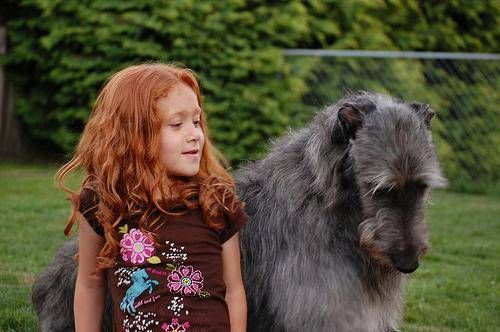

In [5]:
# Viewing an image using filename
Image("../input/dog-breed-identification/train/0042188c895a2f14ef64a918ed9c7b64.jpg")

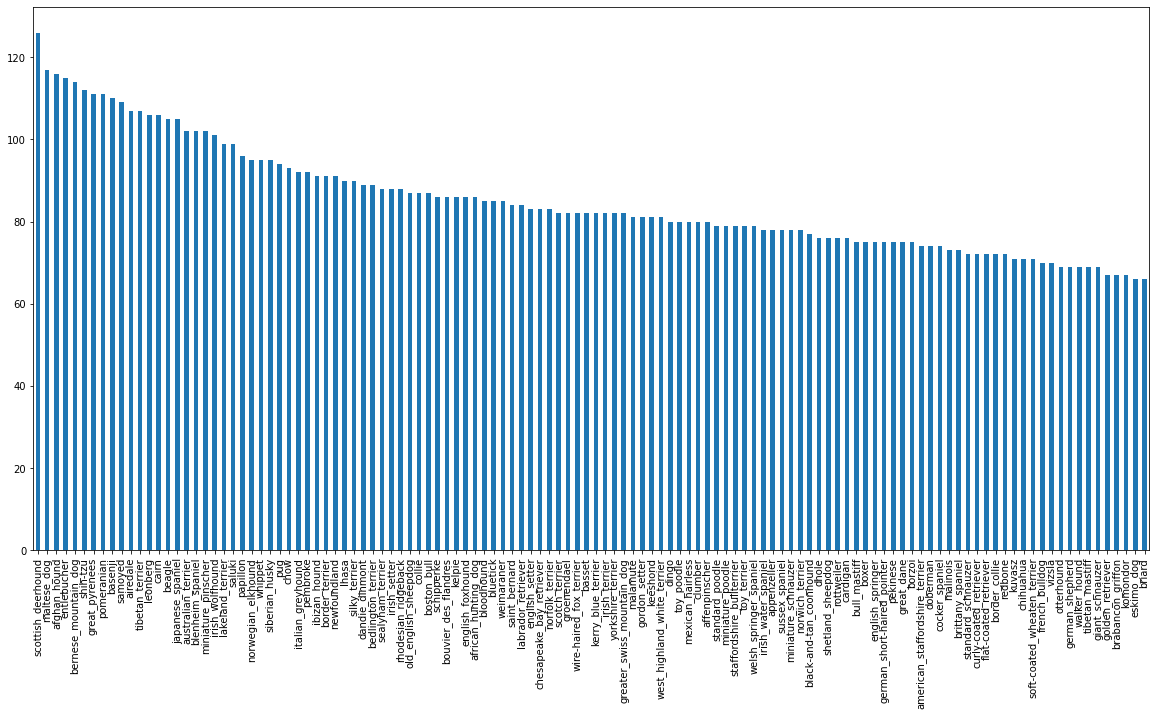

In [6]:
# Visualizing the distribution of images accoding to class
labels_csv["breed"].value_counts().plot.bar(figsize=(20, 10));

# 4. Data Preprocessing:
---
> In this step, we have cleaned the data thus obtained for the previous steps before splitting them into training and testing datasets. We have also cleaned the images obtained by reshaping their shapes and changing their color changes.

In [ ]:
# Converting the label columns to Numpy array
labels = labels_csv['breed'].to_numpy()

# Viewing the first 10 labels
labels[:10]

In [8]:
# Saving the count of total number of unique breeds to a variabkle
unique_breeds = np.unique(labels)

print("Total number of unique breeds : ", len(unique_breeds))

Total number of unique breeds :  120


In [9]:
# Converting the labels to a boolean array
boolean_labels = [label == np.array(unique_breeds) for label in labels]

# Viewing how it looks like
boolean_labels[0]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [10]:
# Creating training and validation sets

# Separating the features and labels
X = filenames
y = boolean_labels

print(f"Number of training images: {len(X)}")
print(f"Number of labels: {len(y)}")

X_train, X_val, y_train, y_val = train_test_split(X,
                                                  y, 
                                                  test_size=0.2,
                                                  random_state=42)

print(f"Number of training images : {len(X_train)}")
print(f"Number of validation images : {len(X_val)}")

Number of training images: 10222
Number of labels: 10222
Number of training images : 8177
Number of validation images : 2045


#### Image Preprocessing:

> In this step, we have resized and reshaped the images and we have also changed their color changes.

In [11]:
# Reading an image in and checking shape
image = plt.imread(filenames[42])
print(f"Image Shape : {image.shape}")

# Converting the image to a Tensorflow Tensor
tf.constant(image)

Image Shape : (257, 350, 3)


2022-04-29 11:54:55.774224: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-29 11:54:55.888745: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-29 11:54:55.889565: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-29 11:54:55.892152: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

<tf.Tensor: shape=(257, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]],

       [[ 56, 104,  66],
        [ 58, 106,  66],
        [ 64, 112,  72],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 73, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  13],
        [  6,  15,  14],
        ...,
        [120, 113,  67],
        [126, 118,  72],
        [122, 114,  67]],

       [[  0,   4,   6],
        [  0,   9,   8],
        [  1,  10,   9],
        ...,
        [105,  98,  52],
        [111, 104,  58],
        [111, 103,  56]],

       [[ 18,  16,  37],
        [ 18,  18,  28],
        [ 17,  20,  11],
        ...,
        [101,  92,  5

In [12]:
# Setting the Image Size
IMAGE_SIZE = 224

# Creating a function to preprocess the images
def process_image(image_path):
    
    # Read in the image
    image = tf.io.read_file(image_path)
    
    # Turn the image into numerical tensors
    image = tf.image.decode_jpeg(image, channels=3)
    
    # Convert the color channel values from 0-225 to 0-1
    image = tf.image.convert_image_dtype(image, tf.float32)
    
    # Resize the image
    image = tf.image.resize(image, size=[IMAGE_SIZE, IMAGE_SIZE])
    
    return image

#### Batching the Data:
> Here, we have created batches after processing the images with their labels for faster and effective training.

In [13]:
# Creating a function to return a tuple (image, label)
def get_image_label(image_path, label):
    """
    Takes an image file path name and the associated label,
    processes the image and returns a tuple of (image, label).
    """
    image = process_image(image_path)
    return image, label

In [14]:
# Setting the batch size at 32 
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
    """
    Function to batch the data
    """
    # If the data is a test dataset, we probably don't have labels
    if test_data:
        print("Creating test data batches...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) # only filepaths
        data_batch = data.map(process_image).batch(BATCH_SIZE)
        return data_batch
  
    # If the data if a valid dataset, we don't need to shuffle it
    elif valid_data:
        print("Creating validation data batches...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                                   tf.constant(y))) # labels
        data_batch = data.map(get_image_label).batch(BATCH_SIZE)
        return data_batch

    else:
        # If the data is a training dataset, we shuffle it
        print("Creating training data batches...")
        # Turn filepaths and labels into Tensors
        data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                                   tf.constant(y))) # labels
    
        # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
        data = data.shuffle(buffer_size=len(x))

        # Create (image, label) tuples (this also turns the image path into a preprocessed image)
        data = data.map(get_image_label)

        # Turn the data into batches
        data_batch = data.batch(BATCH_SIZE)
    return data_batch

In [15]:
# Creating training and validation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [16]:
# Checking the different attributes of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

# 5. Model Evaluation:
---
> In this step, we have chosen the ResNet50V2 as it poses the most performance in problems such as these. To squeeze out even more performance in this case, we have used Adam optimizer and Categorical Cross Entropy.

In [17]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMAGE_SIZE, IMAGE_SIZE, 3] # batch, height, width, colour channels

# Model URL for ResNet50V2
MODEL_URL = "https://tfhub.dev/tensorflow/resnet_50/classification/1"

# Creating the model for ResNet50V2
model = tf.keras.Sequential([
    # Layer 1 : Input Layer
    hub.KerasLayer(MODEL_URL),
    
    # Layer 2 : Output Layer
    tf.keras.layers.Dense(120, activation='softmax')
])

# Compiling the model
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

# Building the model
model.build(INPUT_SHAPE)

# Summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1001)              25612201  
_________________________________________________________________
dense (Dense)                (None, 120)               120240    
Total params: 25,732,441
Trainable params: 120,240
Non-trainable params: 25,612,201
_________________________________________________________________


In [18]:
# Creating Tensorflow EarlyStopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)
# Fitting the model
hist = model.fit(train_data, epochs=50, validation_data=val_data, callbacks=[early_stopping])

Epoch 1/50


2022-04-29 11:55:09.073581: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-04-29 11:55:15.101644: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


256/256 [==============================] - 62s 198ms/step - loss: 4.6905 - accuracy: 0.3620 - val_loss: 4.5863 - val_accuracy: 0.6494
Epoch 2/50
256/256 [==============================] - 25s 96ms/step - loss: 4.4844 - accuracy: 0.7535 - val_loss: 4.3854 - val_accuracy: 0.7976
Epoch 3/50
256/256 [==============================] - 25s 98ms/step - loss: 4.2816 - accuracy: 0.8068 - val_loss: 4.1873 - val_accuracy: 0.8215
Epoch 4/50
256/256 [==============================] - 24s 93ms/step - loss: 4.0820 - accuracy: 0.8310 - val_loss: 3.9921 - val_accuracy: 0.8416
Epoch 5/50
256/256 [==============================] - 25s 96ms/step - loss: 3.8859 - accuracy: 0.8443 - val_loss: 3.8003 - val_accuracy: 0.8479
Epoch 6/50
256/256 [==============================] - 24s 95ms/step - loss: 3.6932 - accuracy: 0.8495 - val_loss: 3.6118 - val_accuracy: 0.8504
Epoch 7/50
256/256 [==============================] - 25s 96ms/step - loss: 3.5042 - accuracy: 0.8569 - val_loss: 3.4270 - val_accuracy: 0.8528
Ep

#### Model Evaluation:

> In this step, we have plotted the performance of the model in terms of accuracy vs epochs and loss vs epochs.

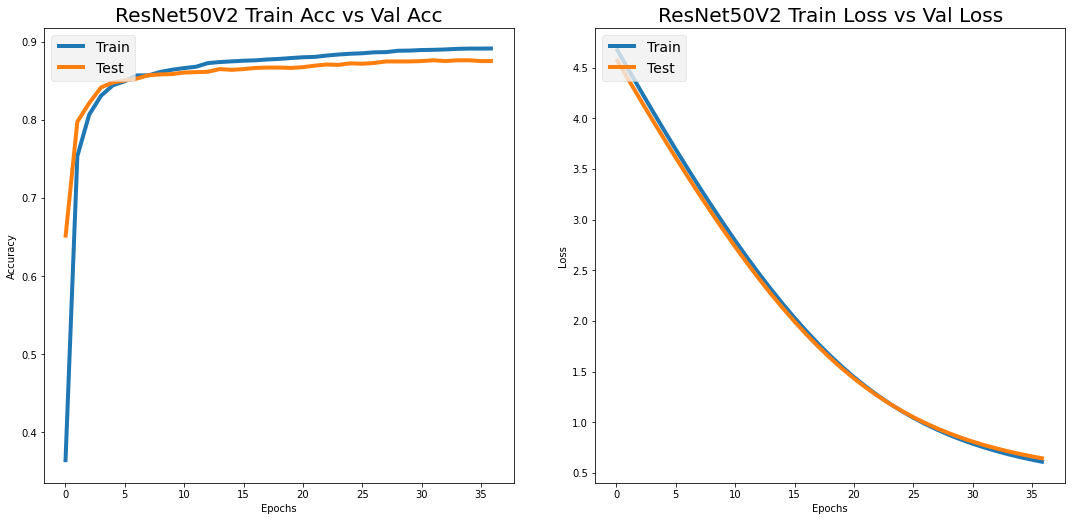

In [19]:
# Creating graphs to visualize the accuracy and loss for the models
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(16, 8), squeeze=False)

fig.tight_layout(pad=5)

plt.style.use('fivethirtyeight')

# Graph for ResNet50V2 Training Accuracy vs Validation Accuracy
axes[0][0].plot(hist.history['accuracy'])
axes[0][0].plot(hist.history['val_accuracy'])
axes[0][0].set_ylabel("Accuracy")
axes[0][0].set_xlabel("Epochs")
axes[0][0].set_title('ResNet50V2 Train Acc vs Val Acc')
axes[0][0].legend(['Train', 'Test'], loc='upper left')

# Graph for ResNet50V2 Training Loss vs Validation Loss
axes[0][1].plot(hist.history['loss'])
axes[0][1].plot(hist.history['val_loss'])
axes[0][1].set_ylabel("Loss")
axes[0][1].set_xlabel("Epochs")
axes[0][1].set_title('ResNet50V2 Train Loss vs Val Loss')
axes[0][1].legend(['Train', 'Test'], loc='upper left')

In [20]:
# Making predictions
predictions = model.predict(val_data, verbose=2)

# Viewing the predictions
predictions[0]

64/64 - 6s


array([5.9494650e-04, 5.7802722e-04, 6.7670969e-04, 6.8448309e-04,
       1.0816419e-03, 2.1834227e-03, 6.8563852e-03, 7.6313457e-03,
       4.7375922e-04, 5.4475316e-04, 6.3346891e-04, 6.5880670e-04,
       1.6923011e-03, 9.9250453e-04, 5.2208430e-04, 9.9256181e-04,
       7.2355801e-04, 6.6096312e-04, 5.6105375e-04, 1.6982635e-02,
       5.5520993e-04, 6.9441862e-04, 3.3586677e-03, 4.6049131e-04,
       5.9060968e-04, 6.2155101e-04, 6.1097904e-04, 1.9645861e-03,
       5.3804991e-04, 2.5474580e-02, 6.4574019e-04, 6.0911535e-04,
       5.4314453e-04, 6.9190556e-04, 5.2714691e-04, 4.7511229e-04,
       7.1079400e-04, 1.6310429e-03, 1.2073317e-02, 7.4907643e-04,
       7.7841833e-04, 5.6638289e-04, 6.1139232e-04, 6.1520463e-04,
       5.7246175e-04, 1.3933459e-03, 7.1537419e-04, 6.2362046e-04,
       5.6587055e-04, 5.3124409e-04, 7.8193354e-04, 4.1670064e-04,
       6.5853220e-04, 5.0721789e-04, 5.4446521e-04, 5.8173737e-04,
       5.2959454e-04, 5.9678417e-04, 5.9118192e-04, 5.7091005e

# 6. Performance Measurement
---
> In this step, we have evaluated the performance measure of the model and along with that we have also plotted a heatmap for the confusion matrix.

In [21]:
# Checking the shape of the prediction
print("Viewing the Shape : ", predictions.shape)

# Checking the maximum probability
print(f"Maximum value (probability of prediction) : {np.max(predictions[0])}")

# Maximum index
print(f"Maximum index : {np.argmax(predictions[0])}")

# Predicted label
print(f"Predicted Label : {unique_breeds[np.argmax(predictions[0])]}")

Viewing the Shape :  (2045, 120)
Maximum value (probability of prediction) : 0.8003342151641846
Maximum index : 111
Predicted Label : toy_terrier


In [22]:
# Creating a function to unbatch the data
def unbatching(data):
    '''
    This fuction is used to unbatch the data
    '''
    # Creating variables to save the images and labels
    images = []
    labels = []
    
    # Looping through the unbatched data
    for image, label in data.unbatch().as_numpy_iterator():
        images.append(image)
        labels.append(unique_breeds[np.argmax(label)])
    return images, labels

# Unbatching the validation data
val_images, val_labels = unbatching(val_data)
val_images[0], val_labels[0]

(array([[[0.4615459 , 0.5478204 , 0.60272235],
         [0.4615459 , 0.5478204 , 0.60272235],
         [0.45909494, 0.5453694 , 0.60027134],
         ...,
         [0.41813728, 0.5083334 , 0.56323534],
         [0.4156863 , 0.5058824 , 0.56078434],
         [0.4156863 , 0.5058824 , 0.56078434]],
 
        [[0.45522588, 0.5415004 , 0.59640235],
         [0.45522588, 0.5415004 , 0.59640235],
         [0.4527749 , 0.5390494 , 0.59395134],
         ...,
         [0.41813728, 0.5083334 , 0.56323534],
         [0.4156863 , 0.5058824 , 0.56078434],
         [0.4156863 , 0.5058824 , 0.56078434]],
 
        [[0.45098042, 0.5372549 , 0.5921569 ],
         [0.45098042, 0.5372549 , 0.5921569 ],
         [0.44852945, 0.5348039 , 0.5897059 ],
         ...,
         [0.41813728, 0.5083334 , 0.56323534],
         [0.4156863 , 0.5058824 , 0.56078434],
         [0.4156863 , 0.5058824 , 0.56078434]],
 
        ...,
 
        [[0.18869358, 0.32987005, 0.42398772],
         [0.1894466 , 0.33062306, 0.42179

In [23]:
# Getting the predicted labels
predicted_labels = [unique_breeds[np.argmax(predictions[i])] for i in range(len(predictions))]

In [24]:
confusion_matrix(val_labels, predicted_labels).shape

(120, 120)

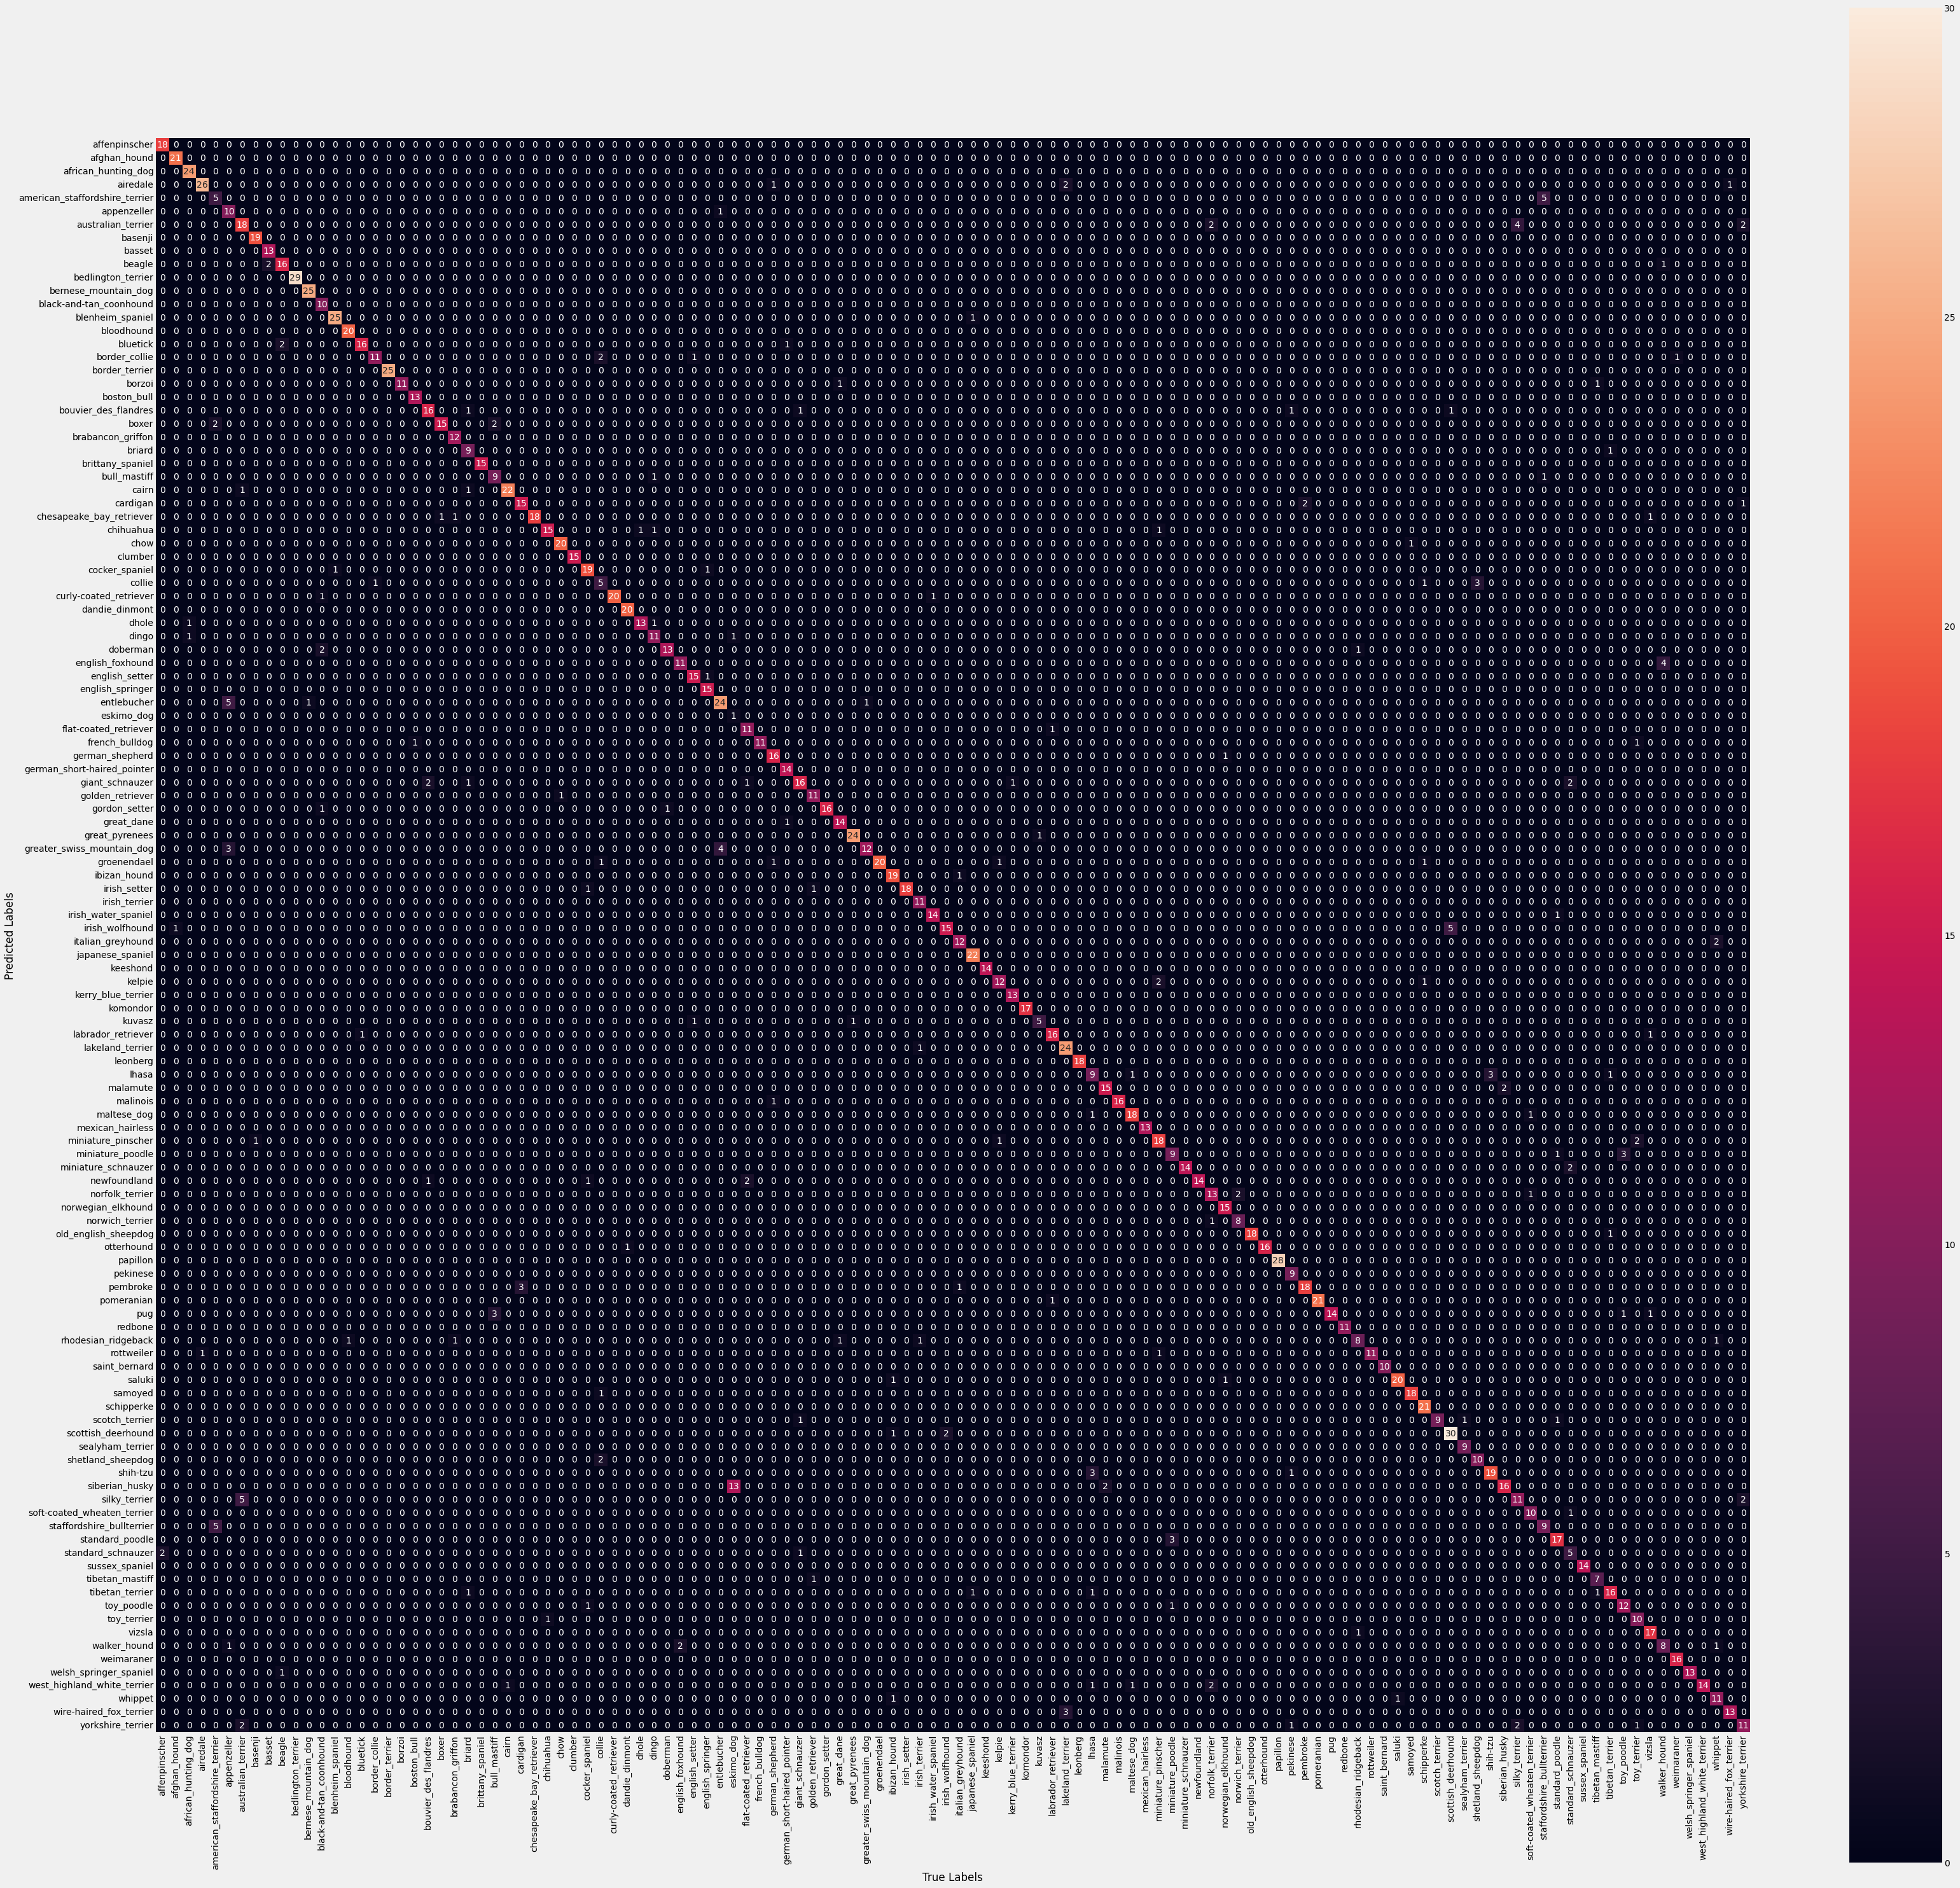

In [25]:
# Plotting the confusion matrix

import seaborn as sns
from sklearn.metrics import precision_recall_fscore_support
plt.figure(figsize=(50, 50))
mat = confusion_matrix(val_labels, predicted_labels)
sns.heatmap(mat.T, square = True, annot = True, cmap = "rocket", xticklabels = np.unique(val_labels), yticklabels = np.unique(predicted_labels))
plt.xlabel("True Labels")
plt.ylabel("Predicted Labels")
plt.show()

In [26]:
print(classification_report(val_labels, predicted_labels))

                                precision    recall  f1-score   support

                 affenpinscher       1.00      0.90      0.95        20
                  afghan_hound       1.00      0.95      0.98        22
           african_hunting_dog       1.00      0.92      0.96        26
                      airedale       0.87      0.96      0.91        27
american_staffordshire_terrier       0.50      0.42      0.45        12
                   appenzeller       0.91      0.53      0.67        19
            australian_terrier       0.69      0.69      0.69        26
                       basenji       1.00      0.95      0.97        20
                        basset       1.00      0.87      0.93        15
                        beagle       0.84      0.84      0.84        19
            bedlington_terrier       1.00      1.00      1.00        29
          bernese_mountain_dog       1.00      0.96      0.98        26
       black-and-tan_coonhound       1.00      0.71      0.83  

In [27]:
# Getting the perfromance metrics of our champion model
print("#******** ResNet50V2 Performance Metrics ********#")
print(" ")
print(f"Accuracy Score  = {accuracy_score(val_labels, predicted_labels) * 100}")
print(f"Precision Score = {precision_score(val_labels, predicted_labels, average='macro') * 100}")
print(f"Recall Score    = {recall_score(val_labels, predicted_labels, average='macro') * 100}")
print(f"F1 Score        = {f1_score(val_labels, predicted_labels, average='macro') * 100}")

#******** ResNet50V2 Performance Metrics ********#
 
Accuracy Score  = 87.53056234718827
Precision Score = 87.41893866009679
Recall Score    = 86.76061206498407
F1 Score        = 86.32713825506251
